In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Extracurricular Activities"] = label_encoder.fit_transform(df['Extracurricular Activities'])

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data latih dan transformasi data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classic

In [8]:
from sklearn.linear_model import LinearRegression
# Inisialisasi model Multi Linear Regression
model = LinearRegression()

In [9]:
# Latih model pada data latih
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluasi model menggunakan Mean Squared Error (MSE) dan R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Menampilkan koefisien dan intercept
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 4.082628398521863
R-squared: 0.9889832909573145
Koefisien: [22.81987144 60.00230374  0.60861668  2.38470742  1.72648297]
Intercept: 11.51783160853865


# Quantum

/Users/muhammadreesarosyid/tensorflow-test/env/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


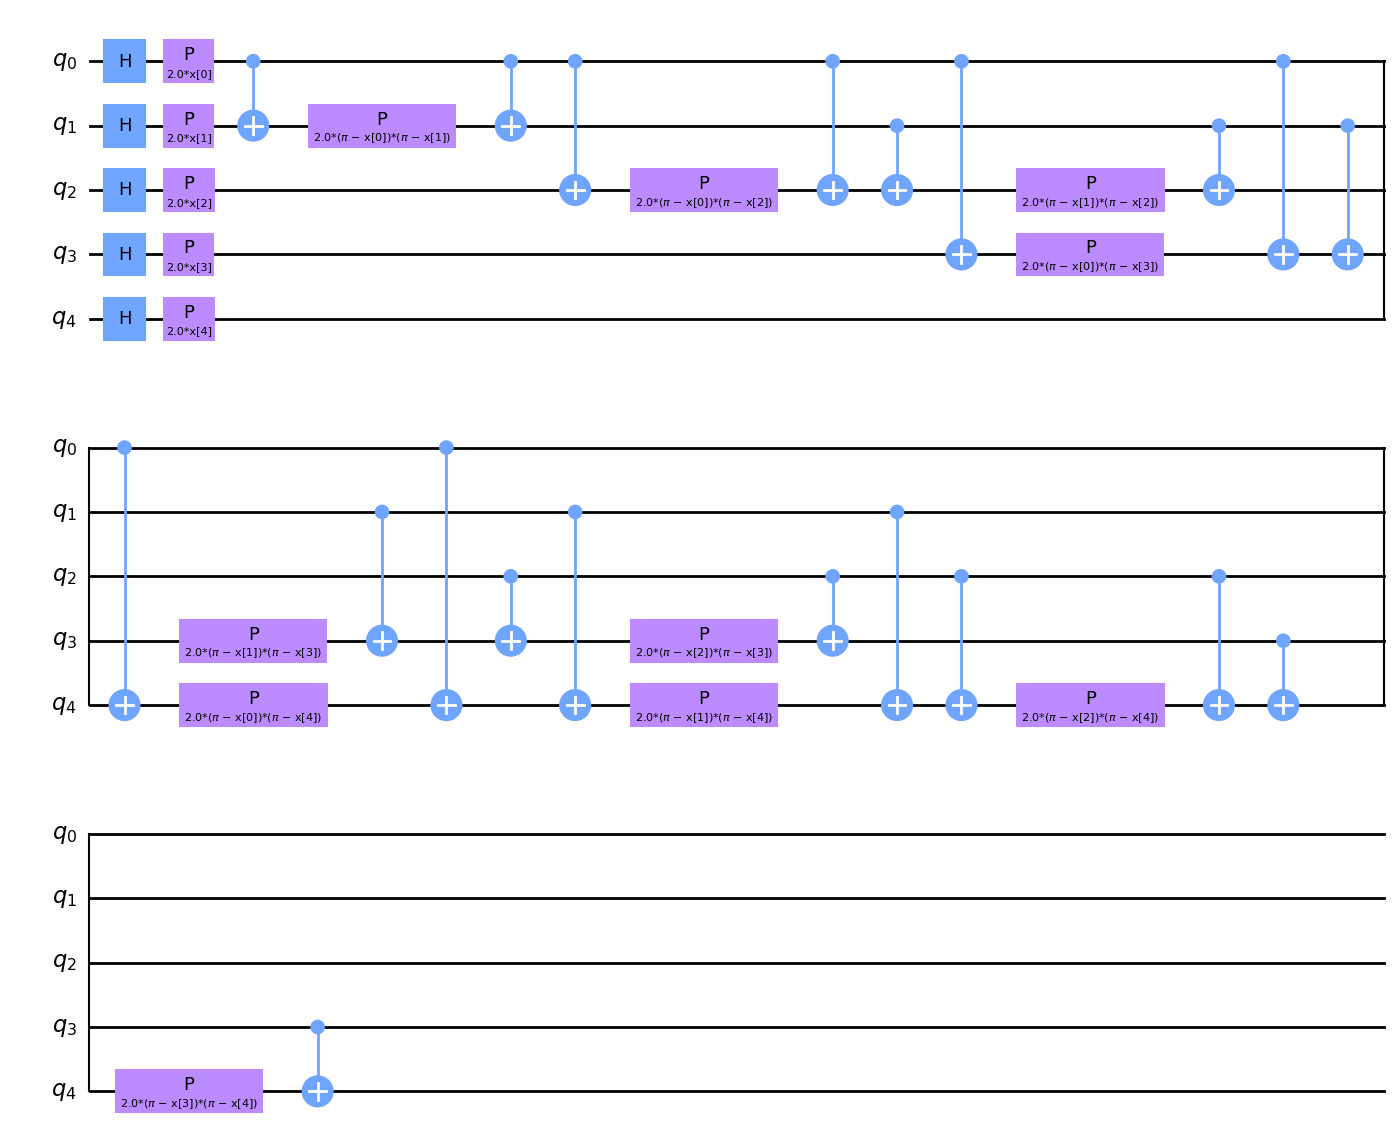

In [12]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC



features_map = ZZFeatureMap(feature_dimension=5, reps=1)
features_map.decompose().draw(output="mpl", fold=20)

/Users/muhammadreesarosyid/tensorflow-test/env/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


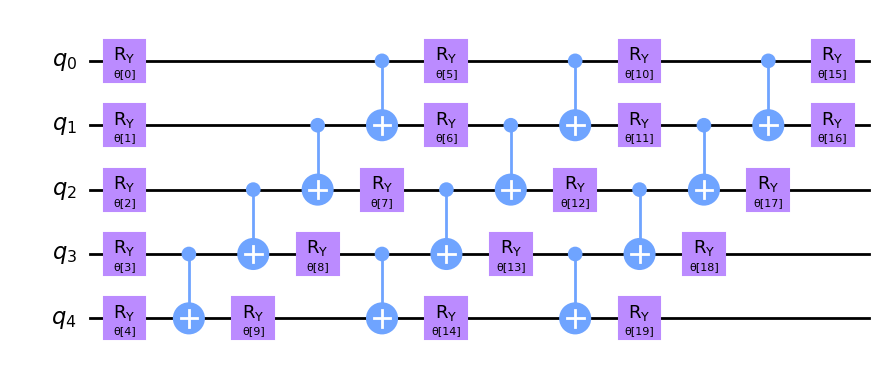

In [13]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=5, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [14]:
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
optimizer = COBYLA(maxiter=30)
sampler = Sampler()

/var/folders/nd/s6snn9l53zg5sthh_ttcvdpr0000gn/T/ipykernel_3966/1507224462.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [15]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

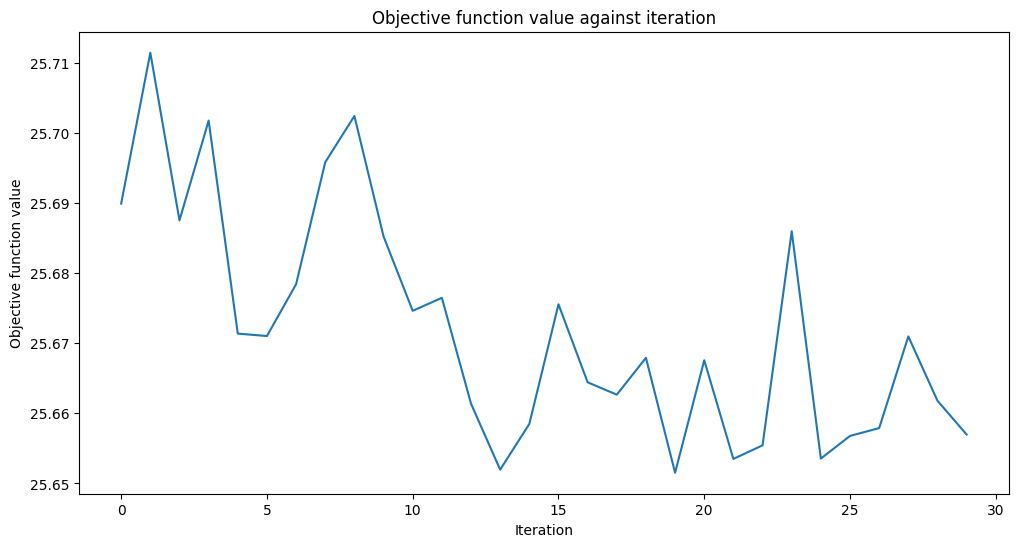

Training time: 705 seconds


In [16]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=features_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

y_train = y_train.to_numpy()

start = time.time()
vqc.fit(X_train_scaled, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [17]:
y_pred = vqc.predict(X_test_scaled)

In [18]:
# Evaluasi model menggunakan Mean Squared Error (MSE) dan R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Menampilkan koefisien dan intercept
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 1243.6375
R-squared: -2.355875469105456
Koefisien: [22.81987144 60.00230374  0.60861668  2.38470742  1.72648297]
Intercept: 11.51783160853865
